In [1]:
# This Python 3 environment is equipped with various useful analytics libraries
# It is based on the Kaggle/python Docker image: https://github.com/kaggle/docker-python
# Below are some helpful libraries that you can import

import numpy as np  # For linear algebra operations
import pandas as pd  # For data manipulation and analysis (e.g., reading CSV files)

# You can find the input data files in the "../input/" directory.
# Running the following code will display the contents of the input directory.

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any output you generate in this notebook will be saved in the current directory.


test_BdBKkAj.csv
train_aWnotuB.csv



The functions I've created:

In [ ]:
import time  # Make sure to import the time module

def datetounix(df):
    # Initialize an empty list to store Unix time values
    unixtime = []
    
    # Iterate through each date in the 'DateTime' column
    for date in df['DateTime']:
        # Convert each date to Unix time (seconds since epoch) and append to the list
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replace the original 'DateTime' column with the new Unix time values
    df['DateTime'] = unixtime
    return df


Importing Libraries

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

**Data Cleaning**

Data cleaning and checking missing values 

In [3]:
# Load the training data into a DataFrame

df_train = pd.read_csv('../input/train_aWnotuB.csv', encoding='ISO-8859-1', engine='c')

# Load the test data into another DataFrame
# Similar to the training data, the file path is directly referenced from the input directory
df_test = pd.read_csv('../input/test_BdBKkAj.csv', encoding='ISO-8859-1', engine='c')

# Display information about the test DataFrame
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
DateTime    11808 non-null object
Junction    11808 non-null int64
ID          11808 non-null int64
dtypes: int64(2), object(1)
memory usage: 276.8+ KB


In [4]:
# To date time
df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
DateTime    11808 non-null datetime64[ns]
Junction    11808 non-null int64
ID          11808 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.8 KB


In [5]:
# Extracting features from the DateTime column for the test data

df_test['Weekday'] = [datetime.weekday(date) for date in df_test.DateTime]  # Day of the week (0=Monday, 6=Sunday)
df_test['Year'] = [date.year for date in df_test.DateTime]  # Extract the year
df_test['Month'] = [date.month for date in df_test.DateTime]  # Extract the month
df_test['Day'] = [date.day for date in df_test.DateTime]  # Extract the day of the month
df_test['Time'] = [((date.hour * 60 + date.minute) * 60) + date.second for date in df_test.DateTime]  # Total seconds since midnight
df_test['Week'] = [date.isocalendar()[1] for date in df_test.DateTime]  # Week number of the year
df_test['Quarter'] = [((date.month - 1) // 3) + 1 for date in df_test.DateTime]  # Quarter of the year

# Extracting features from the DateTime column for the train data

df_train['Weekday'] = [datetime.weekday(date) for date in df_train.DateTime]  # Day of the week
df_train['Year'] = [date.year for date in df_train.DateTime]  # Extract the year
df_train['Month'] = [date.month for date in df_train.DateTime]  # Extract the month
df_train['Day'] = [date.day for date in df_train.DateTime]  # Extract the day of the month
df_train['Time'] = [((date.hour * 60 + date.minute) * 60) + date.second for date in df_train.DateTime]  # Total seconds since midnight
df_train['Week'] = [date.isocalendar()[1] for date in df_train.DateTime]  # Week number of the year
df_train['Quarter'] = [((date.month - 1) // 3) + 1 for date in df_train.DateTime]  # Quarter of the year


In [9]:
import time  # Ensure this is imported

def datetounix(df):
    # Initialize an empty list to store Unix time values
    unixtime = []
    
    # Iterate through each date in the 'DateTime' column
    for date in df['DateTime']:
        # Convert each date to Unix time (seconds since epoch) and append to the list
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replace the original 'DateTime' column with the new Unix time values
    df['DateTime'] = unixtime
    return df


Further steps of anlalyses

Feature ranking:
Feature 0: DateTime (0.379054)
Feature 7: Time (0.366571)
Feature 6: Day (0.064002)
Feature 3: Weekday (0.061213)
Feature 2: ID (0.051070)
Feature 1: Junction (0.039029)
Feature 8: Week (0.027847)
Feature 5: Month (0.006866)
Feature 4: Year (0.002337)
Feature 9: Quarter (0.002011)


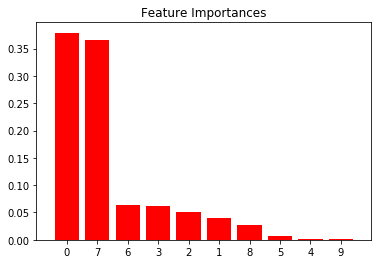

In [10]:
from sklearn.ensemble import ExtraTreesClassifier  # Ensure you have this import
import operator
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Create an instance of the Extra Trees Classifier for feature selection
tree_clf = ExtraTreesClassifier()

# Create arrays to hold input (features) and output (target) data
# Remove the target column ('Vehicles') from the DataFrame to create feature set
df_train_features = df_train.drop(['Vehicles'], axis=1)

# Convert timestamp to Unix time (seconds)
df_train_features = datetounix(df_train_features)

# Store features in X array
X = df_train_features.values

# Store target feature in y array
y = df_train['Vehicles'].values

# Fit the model to the data
tree_clf.fit(X, y)

# Prepare variables to extract feature importances
importances = tree_clf.feature_importances_
feature_names = df_train_features.columns.tolist()

# Create a dictionary mapping feature names to their importance scores
feature_imp_dict = dict(zip(feature_names, importances))
# Sort features by their importance scores
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

# Get the indices of the sorted importances
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("Feature %d: %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


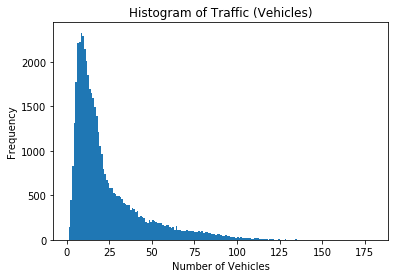

In [11]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Visualize the histogram for the 'Vehicles' column from the training dataset
data = df_train.Vehicles
binwidth = 1  # Set the width of each bin for the histogram

# Create the histogram
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)

# Set the title and labels
plt.title("Histogram of Traffic (Vehicles)")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")

# Display the histogram
plt.show()


Data Preparation:

In [12]:

# Convert timestamp to seconds for the test DataFrame, dropping unnecessary columns
df_test_features = datetounix(df_test.drop(['Year', 'Quarter', 'Month', 'ID'], axis=1))

# Create X_test array from the processed test set
X_test = df_test_features.values


# Prepare the training DataFrame by dropping target and unnecessary columns
df_train_features = df_train.drop(['Vehicles', 'Year', 'Quarter', 'Month', 'ID'], axis=1)

# Convert timestamp to seconds for the training features
df_train_features = datetounix(df_train_features)

# Store features in X array
X = df_train_features.values

# Store target variable in y array
y = df_train['Vehicles'].values


Decision Tree Algorithm

In [14]:

# Data preparation for submission
df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID  # Store IDs from the test DataFrame

# Start time for tracking execution duration
start_time = time.time()

# Create a decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', random_state=13)

# Fit the model using the training data
clf.fit(X, y)

# Predict the outcomes for the test data
predictions = clf.predict(X_test)

# Print the time taken to execute the prediction
print("The time taken to execute is %s seconds" % (time.time() - start_time))

# Prepare the solution DataFrame with predictions
df_solution['Vehicles'] = predictions

# Display the solution DataFrame
df_solution


The time taken to execute is 0.7301113605499268 seconds


,ID,Vehicles
0,20170701001,70
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,40
5,20170701051,40
6,20170701061,40
7,20170701071,30
8,20170701081,47
9,20170701091,44
